# Building Data Genome Project 2.0
## Exploratory data analysis of weather

Biam! (pic.biam@gmail.com)

In [1]:
# data and numbers
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.dpi'] = 80
import seaborn as sns
sns.set_style("darkgrid")
mpl.style.use('ggplot')

import gc

In [4]:
import os

# Ensure we're working from project root
current_dir = os.getcwd()
if current_dir.endswith('notebooks'):
    os.chdir('..')
    print("Adjusted working directory to project root")

Adjusted working directory to project root


# Dataset

* <code>timestamp</code>: date and time in the format YYYY-MM-DD hh:mm:ss. Local timezone.
* <code>site_id</code>: animal-code-name for the site.
* <code>airTemperature</code>: The temperature of the air in degrees Celsius (ºC).
* <code>cloudCoverage</code>: Portion of the sky covered in clouds, in [oktas](https://en.wikipedia.org/wiki/Okta).
* <code>dewTemperature</code>: The dew point (the temperature to which a given parcel of air must be cooled at constant pressure and water vapor content in order for saturation to occur) in degrees Celsius (ºC).
* <code>precipDepth1HR</code>: The depth of liquid precipitation that is measured over a one hour accumulation period (mm).
* <code>precipDepth6HR</code>: The depth of liquid precipitation that is measured over a six hour accumulation period (mm).
* <code>seaLvlPressure</code>: The air pressure relative to Mean Sea Level (MSL) (mbar or hPa).
* <code>windDirection</code>: The angle, measured in a clockwise direction, between true north and the direction from which the wind is blowing (degrees).
* <code>windSpeed</code>: The rate of horizontal travel of air past a fixed point (m/s).

In [2]:
path = "data/weather/"

In [5]:
# Weather data
weather = pd.read_csv(path + "weather.csv")
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331166 entries, 0 to 331165
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       331166 non-null  object 
 1   site_id         331166 non-null  object 
 2   airTemperature  331038 non-null  float64
 3   cloudCoverage   160179 non-null  float64
 4   dewTemperature  330838 non-null  float64
 5   precipDepth1HR  197980 non-null  float64
 6   precipDepth6HR  18162 non-null   float64
 7   seaLvlPressure  309542 non-null  float64
 8   windDirection   318161 non-null  float64
 9   windSpeed       330592 non-null  float64
dtypes: float64(8), object(2)
memory usage: 25.3+ MB


# Exploratory Data Analysis

## Missing values

In [6]:
# Percentage of missing values in each feature
weather.isna().sum()/len(weather)*100

timestamp          0.000000
site_id            0.000000
airTemperature     0.038651
cloudCoverage     51.631810
dewTemperature     0.099044
precipDepth1HR    40.217293
precipDepth6HR    94.515741
seaLvlPressure     6.529656
windDirection      3.927034
windSpeed          0.173327
dtype: float64

## Correlation

In [7]:
# Drop categorical features
weather1 = weather.drop(["timestamp","site_id","cloudCoverage","windDirection"], axis=1)

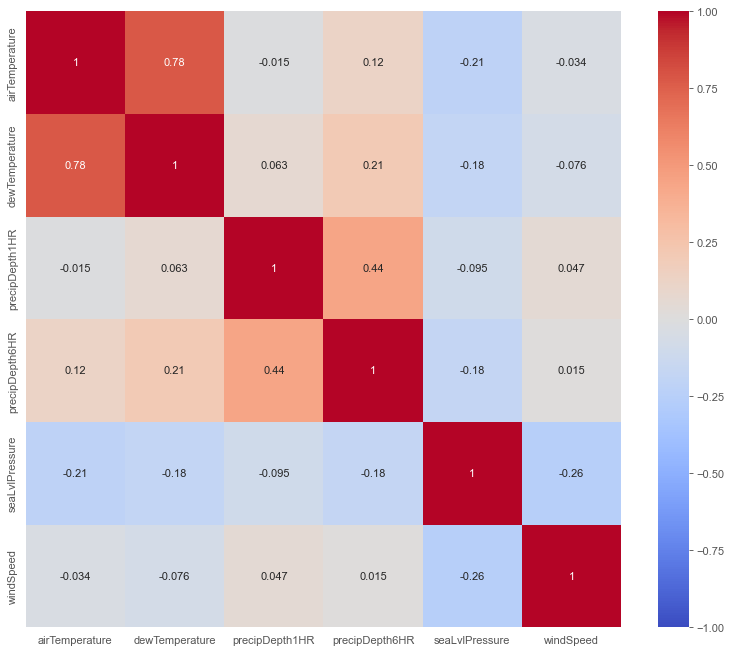

In [10]:
# Plot heatmap
f = plt.figure(1, figsize=(12,10))
sns.heatmap(weather1.corr(), cmap="coolwarm", vmin=-1, vmax=1, annot=True)

plt.show()

In [7]:
f.savefig("figures/weather_corr.png", bbox_inches='tight')
f.savefig("figures/weather_corr.pdf", bbox_inches='tight')

In [8]:
del(weather1)

## Weather features distribution

In [11]:
#colors = ["crimson","mediumvioletred","orangered","gold","yellowgreen","lightseagreen","royalblue","rebeccapurple","slategray"]
colors = ["yellowgreen","dodgerblue","slategray"]

### Pie plots

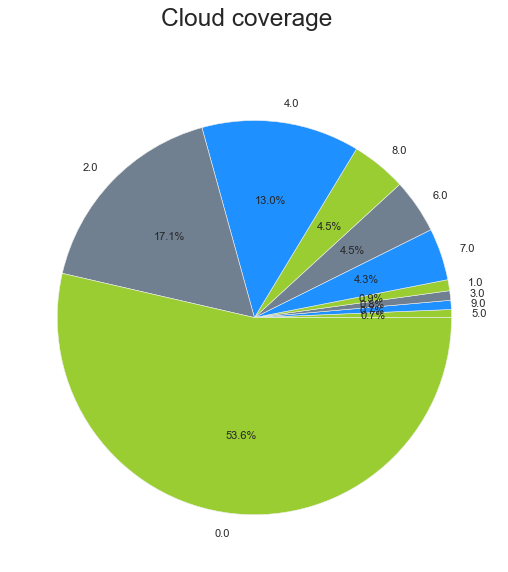

In [12]:
# Make square figures and axes
f = plt.figure(1, figsize=(8,8))

# Temporal dataframe with cloud cover counts
temp1 = pd.DataFrame(weather.groupby("cloudCoverage").count().timestamp).rename(columns={"timestamp":"Count"})
temp_labels1 = temp1["Count"].sort_values().index
temp_counts1 = temp1["Count"].sort_values()
# Cloud cover pie chart
g4 = plt.pie(temp_counts1, labels=temp_labels1, autopct='%1.1f%%', shadow=False, colors=colors)

# Figure title
plt.suptitle('Cloud coverage', fontsize=22)

plt.show()

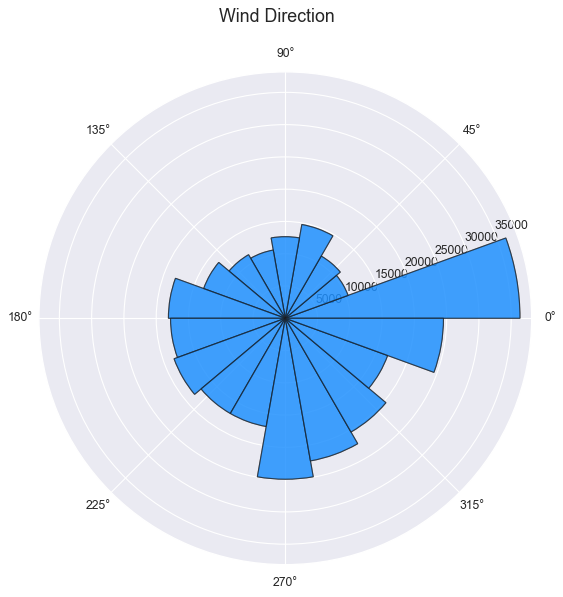

In [14]:
sns.set_theme(rc={'figure.figsize':(8,8)})

# Wind direction (radial plot)
degrees = weather["windDirection"]
radians = np.deg2rad(weather["windDirection"])
bin_size = 20
a , b = np.histogram(degrees, bins=np.arange(0, 360+bin_size, bin_size))
centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])
# Wind direction plot
plt.subplot(aspect=2, projection='polar')
g4 = plt.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color="dodgerblue", alpha=0.6, edgecolor='k')
# Figure title
plt.suptitle('Wind Direction', fontsize=16)

plt.show()

In [16]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331166 entries, 0 to 331165
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       331166 non-null  object 
 1   site_id         331166 non-null  object 
 2   airTemperature  331038 non-null  float64
 3   cloudCoverage   160179 non-null  float64
 4   dewTemperature  330838 non-null  float64
 5   precipDepth1HR  197980 non-null  float64
 6   precipDepth6HR  18162 non-null   float64
 7   seaLvlPressure  309542 non-null  float64
 8   windDirection   318161 non-null  float64
 9   windSpeed       330592 non-null  float64
dtypes: float64(8), object(2)
memory usage: 25.3+ MB


### Countplots and histograms

/var/folders/12/85nf31093ql4yz69s52lv2y80000gn/T/ipykernel_96752/77922287.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g1 = sns.distplot(weather["airTemperature"].dropna(), ax=ax1, color=color)
/var/folders/12/85nf31093ql4yz69s52lv2y80000gn/T/ipykernel_96752/77922287.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

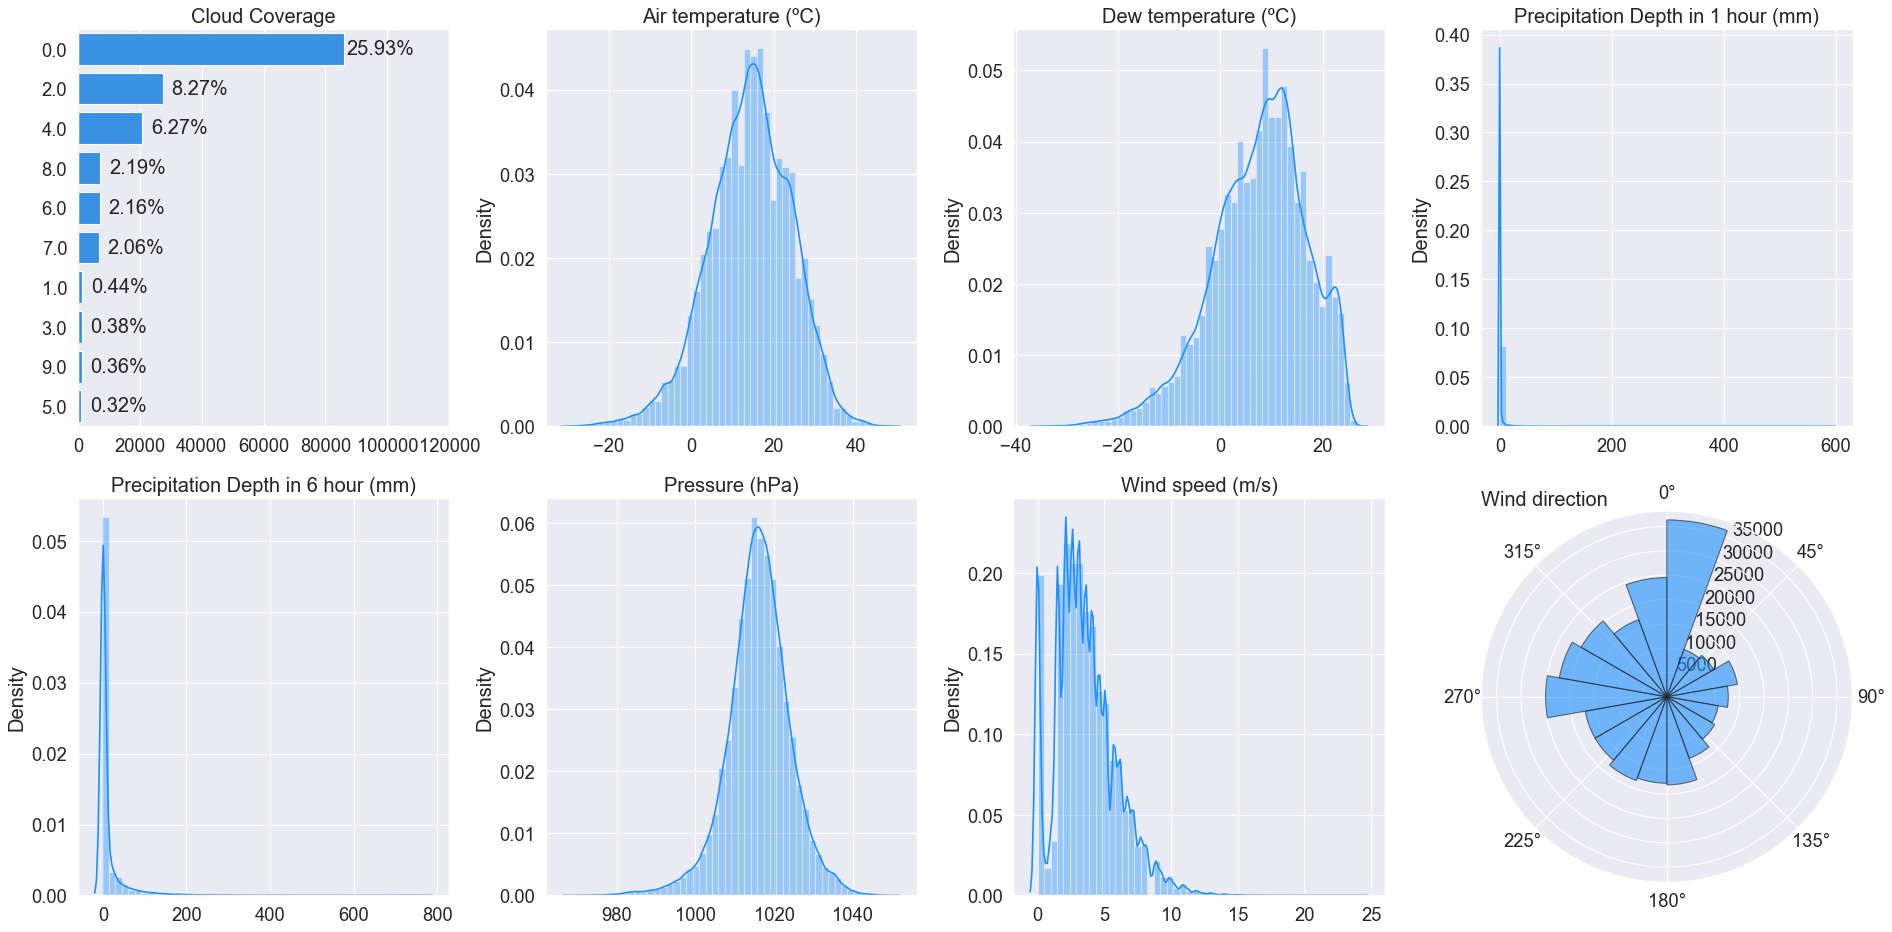

In [30]:
sns.set_theme(rc={'figure.figsize':(24,12)})
sns.set_theme(font_scale = 1.5)
f, axes = plt.subplots(2, 4)
axes = axes.flatten()

color = "dodgerblue"

# Cloud Coverage countplot in decreasing order
ax0 = axes[0]
g0 = sns.countplot(data=weather, y="cloudCoverage", color= color, orient="h", ax=ax0, order = weather['cloudCoverage'].value_counts().index)
ax0.title.set_text('Cloud Coverage')
ax0.set(ylabel="", xlabel="", xlim=(0,120000))
# adds percentage    
total = float(len(weather)) # number of rows
for p in g0.patches:
    width = p.get_width()
    g0.text(width + 12000,
            p.get_y() + p.get_height()/1.5,
            '{:1.2%}'.format(width/total),
            ha="center") 

# "airTemperature" histogram
ax1 = axes[1]
g1 = sns.distplot(weather["airTemperature"].dropna(), ax=ax1, color=color)
ax1.set_title('Air temperature (ºC)')
ax1.set(xlabel="")

# "dewTemperature" histogram
ax2 = axes[2]
g2 = sns.distplot(weather["dewTemperature"].dropna(), ax=ax2, color=color)
ax2.set_title('Dew temperature (ºC)')
ax2.set(xlabel="")

# "precipDepth1HR" histogram
ax3 = axes[3]
g3 = sns.distplot(weather["precipDepth1HR"].dropna(), ax=ax3, color=color, kde_kws={'bw':0.1})
ax3.set_title('Precipitation Depth in 1 hour (mm)')
ax3.set(xlabel="")

# "precipDepth6HR" histogram
ax4 = axes[4]
g4 = sns.distplot(weather["precipDepth6HR"].dropna(), ax=ax4, color=color)
ax4.set_title('Precipitation Depth in 6 hour (mm)')
ax4.set(xlabel="")

# "seaLvlPressure" histogram
ax5 = axes[5]
g5 = sns.distplot(weather["seaLvlPressure"].dropna(), ax=ax5, color=color)
ax5.set_title('Pressure (hPa)')
ax5.set(xlabel="")

# "windSpeed" histogram
ax6 = axes[6]
g6 = sns.distplot(weather["windSpeed"].dropna(), ax=ax6, color=color)
ax6.set_title('Wind speed (m/s)')
ax6.set(xlabel="")

# "windDirection" polar histogram
degrees = weather["windDirection"]
radians = np.deg2rad(weather["windDirection"])
bin_size = 20
a , b = np.histogram(degrees, bins=np.arange(0, 360+bin_size, bin_size))
centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])
ax7 = f.add_subplot(248, projection='polar')
ax7.set_theta_zero_location("N")
ax7.set_theta_direction("clockwise")
g7 = plt.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color=color, alpha=0.6, edgecolor='k')
ax7.set_title('Wind direction', pad=5, loc="left")

# Remove empty axes
f.delaxes(axes[7])

plt.tight_layout()
plt.show()

In [14]:
f.savefig("figures/weather_features.pdf", bbox_inches='tight')
f.savefig("figures/weather_features.png", dpi=72, bbox_inches='tight')

## Temporal analysis

As observed in the correlation plot, the following features are highly correlated:<br>

* <code>airTemperature</code> and <code>dewTemperature</code>

The features <code>airTemperature</code> will be kept for the following plots. <code>dewTemperature</code>, <code>windDirection</code> and <code>precipDepth</code> won't be eincluded in the temporal analysis (due to correlation or behaviour).

### Behaviour by month

In [33]:
# datetime indexes
times = pd.DatetimeIndex(weather.timestamp)

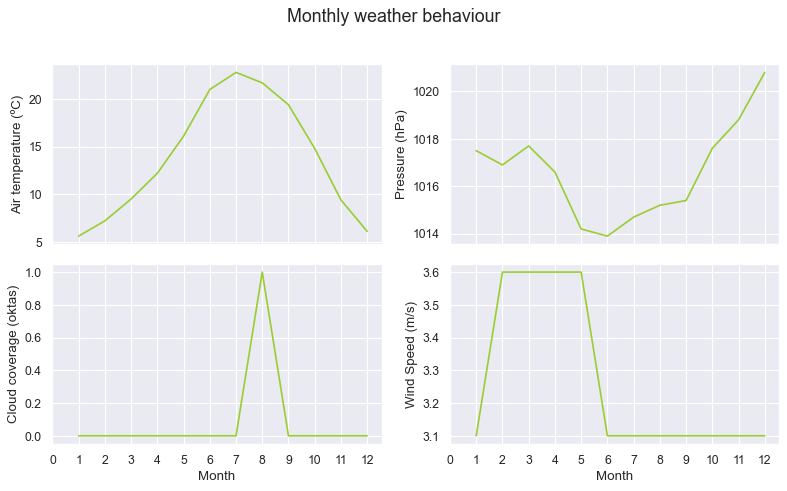

In [37]:
# Median for each month
sns.set_theme(rc={"figure.figsize": (10, 6)})
# sns.set(font_scale = 1)
f, axes = plt.subplots(2, 2, sharex=True)
axes = axes.flatten()
color = colors[0]

# Creates a temporal dataframe grouped by day of the year
temp = pd.DataFrame(
    weather.groupby([times.month]).median(numeric_only=True)[
        [
            "airTemperature",
            "cloudCoverage",
            "seaLvlPressure",
            "windSpeed"
        ]
    ]
).reset_index()

# plots
ax0 = axes[0]
g0 = sns.lineplot(data=temp, x="timestamp", y="airTemperature", ax=ax0, color = color)
#ax1.title.set_text("Apparent temperature")
ax0.set(ylabel="Air temperature (ºC)")

ax1 = axes[1]
g1 = sns.lineplot(data=temp, x="timestamp", y="seaLvlPressure", ax=ax1, color = color)
#ax1.title.set_text("Pressure")
ax1.set(ylabel="Pressure (hPa)")

ax2 = axes[2]
g2 = sns.lineplot(data=temp, x="timestamp", y="cloudCoverage", ax=ax2, color = color)
#ax2.title.set_text("Cloud coverage")
ax2.set(ylabel="Cloud coverage (oktas)")

ax3 = axes[3]
g3 = sns.lineplot(data=temp, x="timestamp", y="windSpeed", ax=ax3, color = color)
#ax3.title.set_text("Relative humidity")
ax3.set(ylabel="Wind Speed (m/s)")

# Customize axes
for ax in axes:
    ax.title.set_size(15)  # fontsize
    ax.set(xlabel="Month")  # X label
    ax.set_xticks(range(13))  # X range

# Figure title
plt.suptitle('Monthly weather behaviour', y=1.02, fontsize=16)

f.tight_layout()

plt.show()

In [17]:
f.savefig("figures/weather_month.pdf", bbox_inches='tight')
f.savefig("figures/weather_month.png", dpi=72, bbox_inches='tight')

<code>airTemperature</code>, <code>seaLvlPressure</code> and <code>windSpeed</code> will be plotted separately for each <code>site_id</code>.

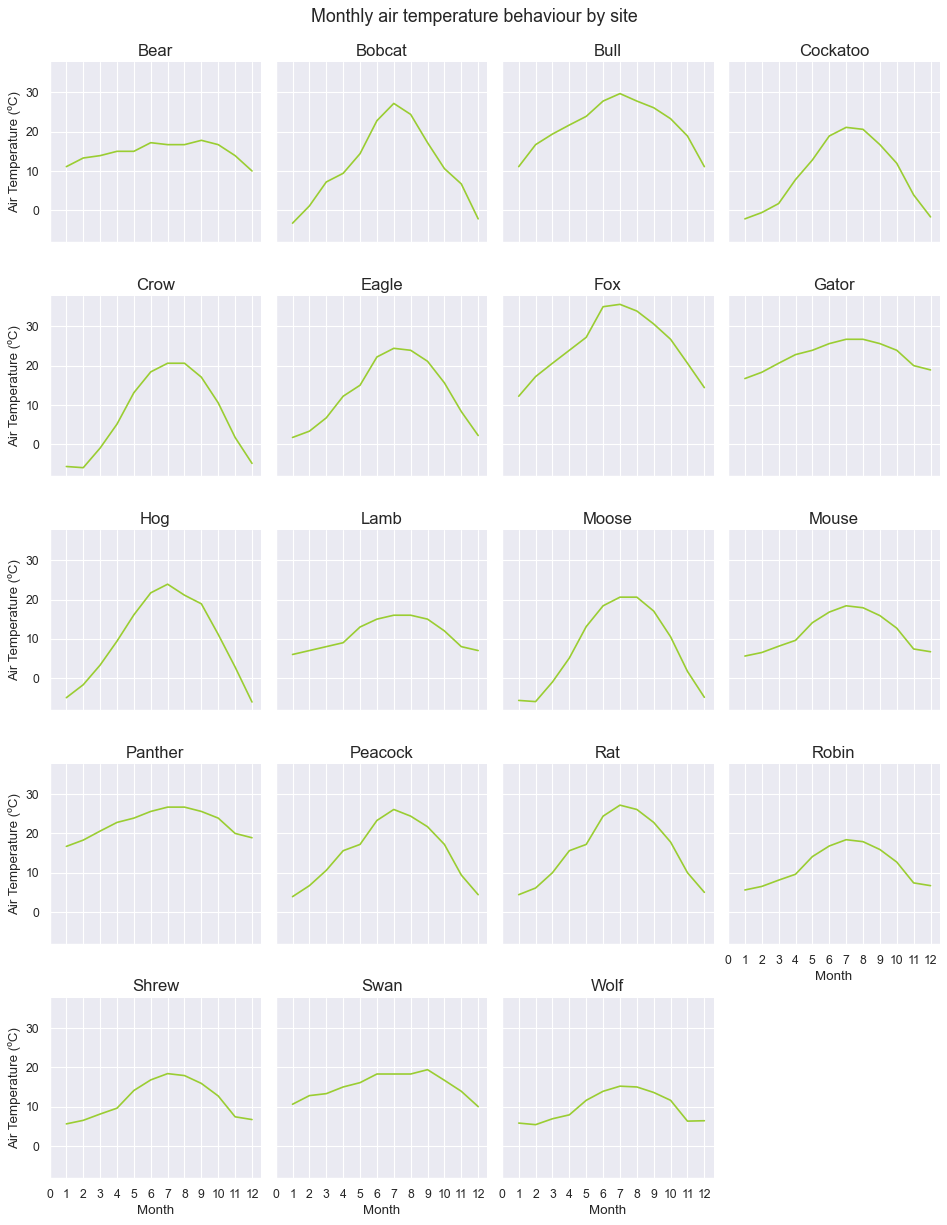

In [39]:
# Creates a temporal dataframe grouped by site and month
temp = pd.DataFrame(weather.groupby(["site_id", times.month]).median(numeric_only=True)["airTemperature"]).reset_index()
# All the plots in a grid
g = sns.FacetGrid(temp, col="site_id", col_wrap=4)
g.map(plt.plot, "timestamp", "airTemperature", color=colors[0])
# Title of each plot
g.set_titles("{col_name}", size=15)
# Axis labels
g.set_axis_labels(x_var="Month", y_var="Air Temperature (ºC)")
g.set(xticks=range(13))
# Figure title
plt.suptitle('Monthly air temperature behaviour by site', y=1.02, fontsize=16)

plt.show()

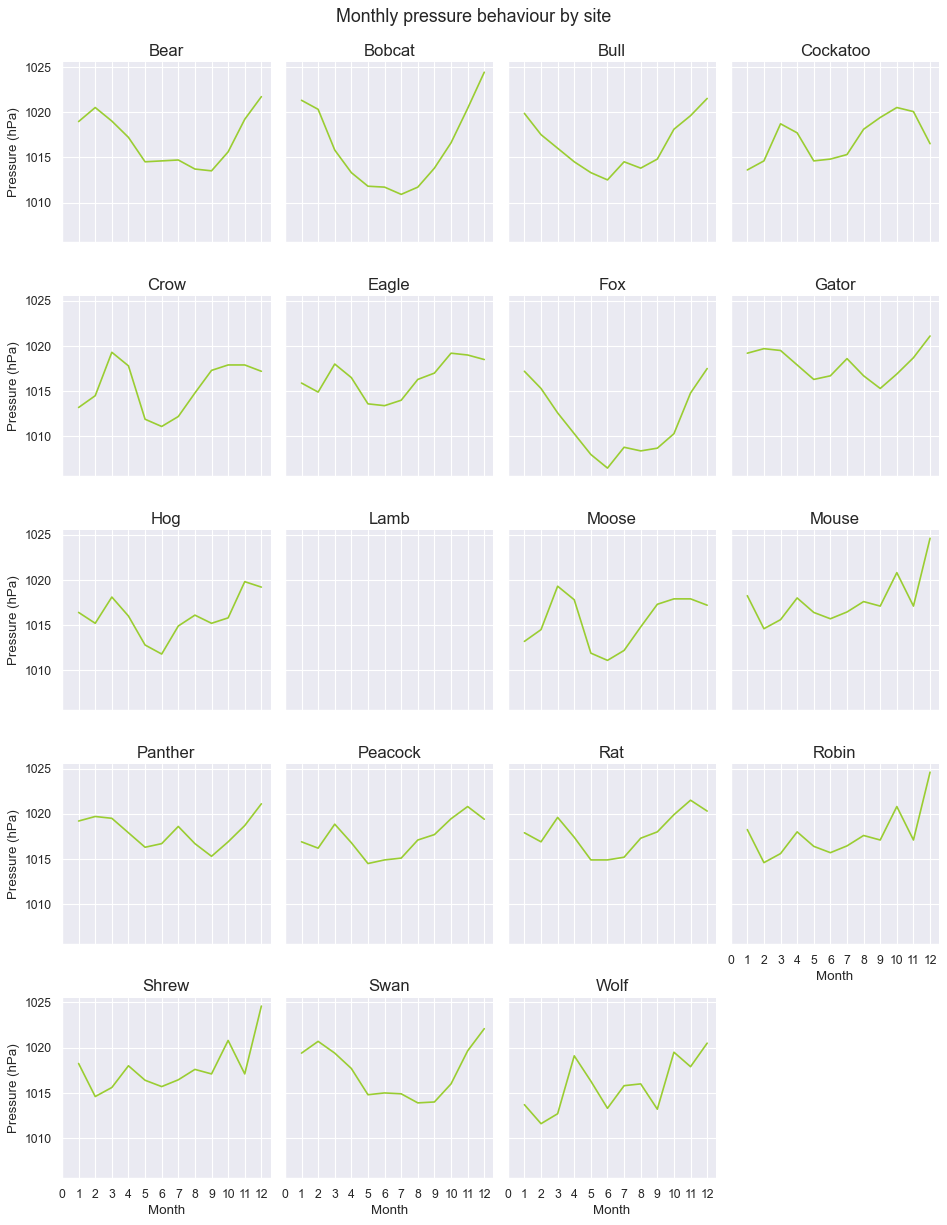

In [43]:
# Creates a temporal dataframe grouped by site and month
temp = pd.DataFrame(weather.groupby(["site_id", times.month]).median(numeric_only=True)["seaLvlPressure"]).reset_index()
# All the plots in a grid
g = sns.FacetGrid(temp, col="site_id", col_wrap=4)
g.map(plt.plot, "timestamp", "seaLvlPressure", color=colors[0])
# Title of each plot
g.set_titles("{col_name}", size=15)
# Axis labels
g.set_axis_labels(x_var="Month", y_var="Pressure (hPa)")
g.set(xticks=range(13))
# Figure title
plt.suptitle('Monthly pressure behaviour by site', y=1.02, fontsize=16)

plt.show()

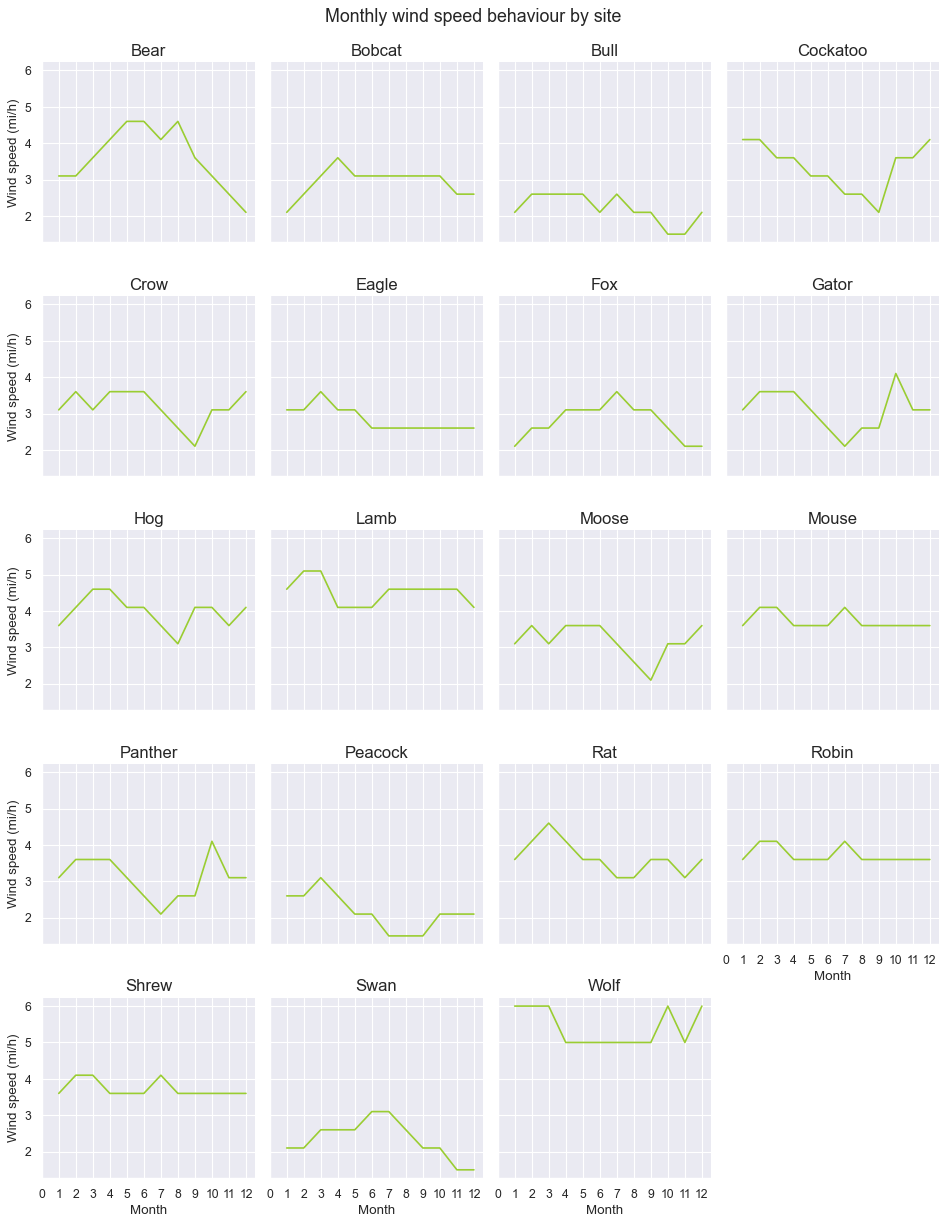

In [44]:
# Creates a temporal dataframe grouped by site and month
temp = pd.DataFrame(weather.groupby(["site_id", times.month]).median(numeric_only=True)["windSpeed"]).reset_index()
# All the plots in a grid
g = sns.FacetGrid(temp, col="site_id", col_wrap=4)
g.map(plt.plot, "timestamp", "windSpeed", color=colors[0])
# Title of each plot
g.set_titles("{col_name}", size=15)
# Axis labels
g.set_axis_labels(x_var="Month", y_var="Wind speed (mi/h)")
g.set(xticks=range(13))
# Figure title
plt.suptitle('Monthly wind speed behaviour by site', y=1.02, fontsize=16)

plt.show()

### Behaviour by hour of the day

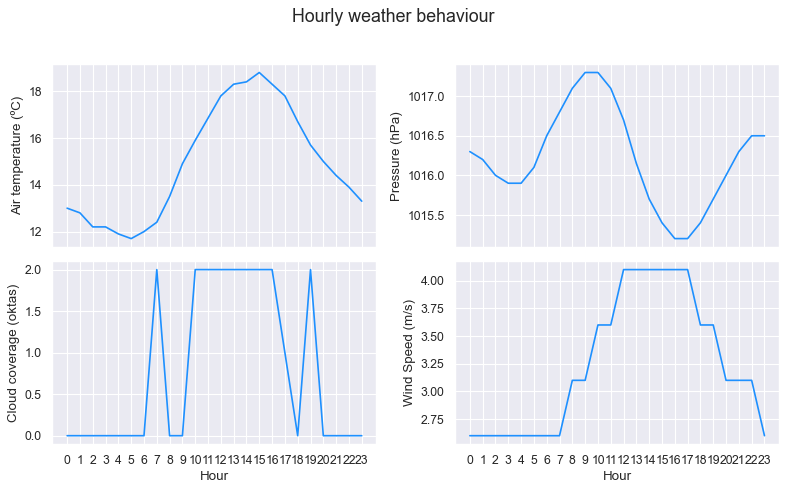

In [47]:
# Median for each hour
sns.set(rc={"figure.figsize": (10, 6)})
#sns.set(font_scale=0.8)
f, axes = plt.subplots(2, 2, sharex=True)
axes = axes.flatten()
color = colors[1]

# Creates a temporal dataframe grouped by hour
temp = pd.DataFrame(
    weather.groupby([times.hour]).median(numeric_only=True)[
        [
            "airTemperature",
            "cloudCoverage",
            "seaLvlPressure",
            "windSpeed"
        ]
    ]
).reset_index()

# plots
ax0 = axes[0]
g0 = sns.lineplot(data=temp, x="timestamp", y="airTemperature", ax=ax0, color = color)
#ax1.title.set_text("Apparent temperature")
ax0.set(ylabel="Air temperature (ºC)")

ax1 = axes[1]
g1 = sns.lineplot(data=temp, x="timestamp", y="seaLvlPressure", ax=ax1, color = color)
#ax1.title.set_text("Pressure")
ax1.set(ylabel="Pressure (hPa)")

ax2 = axes[2]
g2 = sns.lineplot(data=temp, x="timestamp", y="cloudCoverage", ax=ax2, color = color)
#ax2.title.set_text("Cloud coverage")
ax2.set(ylabel="Cloud coverage (oktas)")

ax3 = axes[3]
g3 = sns.lineplot(data=temp, x="timestamp", y="windSpeed", ax=ax3, color = color)
#ax3.title.set_text("Relative humidity")
ax3.set(ylabel="Wind Speed (m/s)")

# Customizw axes
for ax in axes:
    ax.title.set_size(15)  # fontsize
    ax.set(xlabel="Hour")  # X label
    ax.set_xticks(range(24))  # X range

# Figure title
plt.suptitle('Hourly weather behaviour', y=1.02, fontsize=16)

f.tight_layout()

plt.show()

In [22]:
f.savefig("figures/weather_hour.pdf", bbox_inches='tight')
f.savefig("figures/weather_hour.png", dpi=72, bbox_inches='tight')

<code>airTemperature</code>, <code>seaLvlPressure</code> and <code>windSpeed</code> will be plotted separately for each <code>site_id</code>.

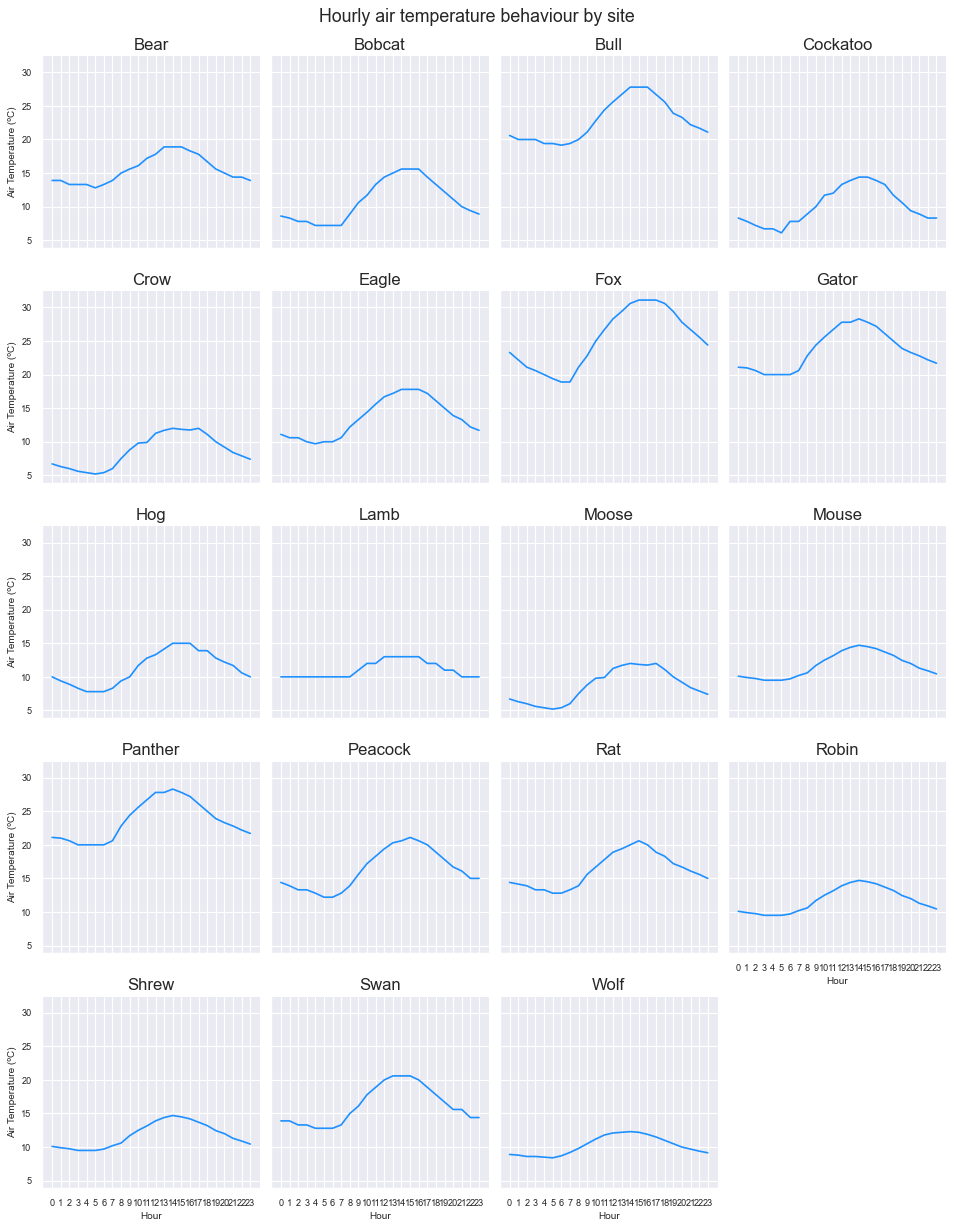

In [50]:
sns.set_theme(rc={'figure.figsize':(12,8)})
sns.set_theme(font_scale = 0.75)
# Creates a temporal dataframe grouped by site and hour
temp = pd.DataFrame(weather.groupby(["site_id", times.hour]).median(numeric_only=True)["airTemperature"]).reset_index()
# All the plots in a grid
g = sns.FacetGrid(temp, col="site_id", col_wrap=4)
g.map(plt.plot, "timestamp", "airTemperature",color=colors[1])
# Title of each plot
g.set_titles("{col_name}", size=15)
# Axis labels
g.set_axis_labels(x_var="Hour", y_var="Air Temperature (ºC)")
g.set(xticks=range(24))
# Figure title
plt.suptitle('Hourly air temperature behaviour by site', y=1.02, fontsize=16)

plt.show()

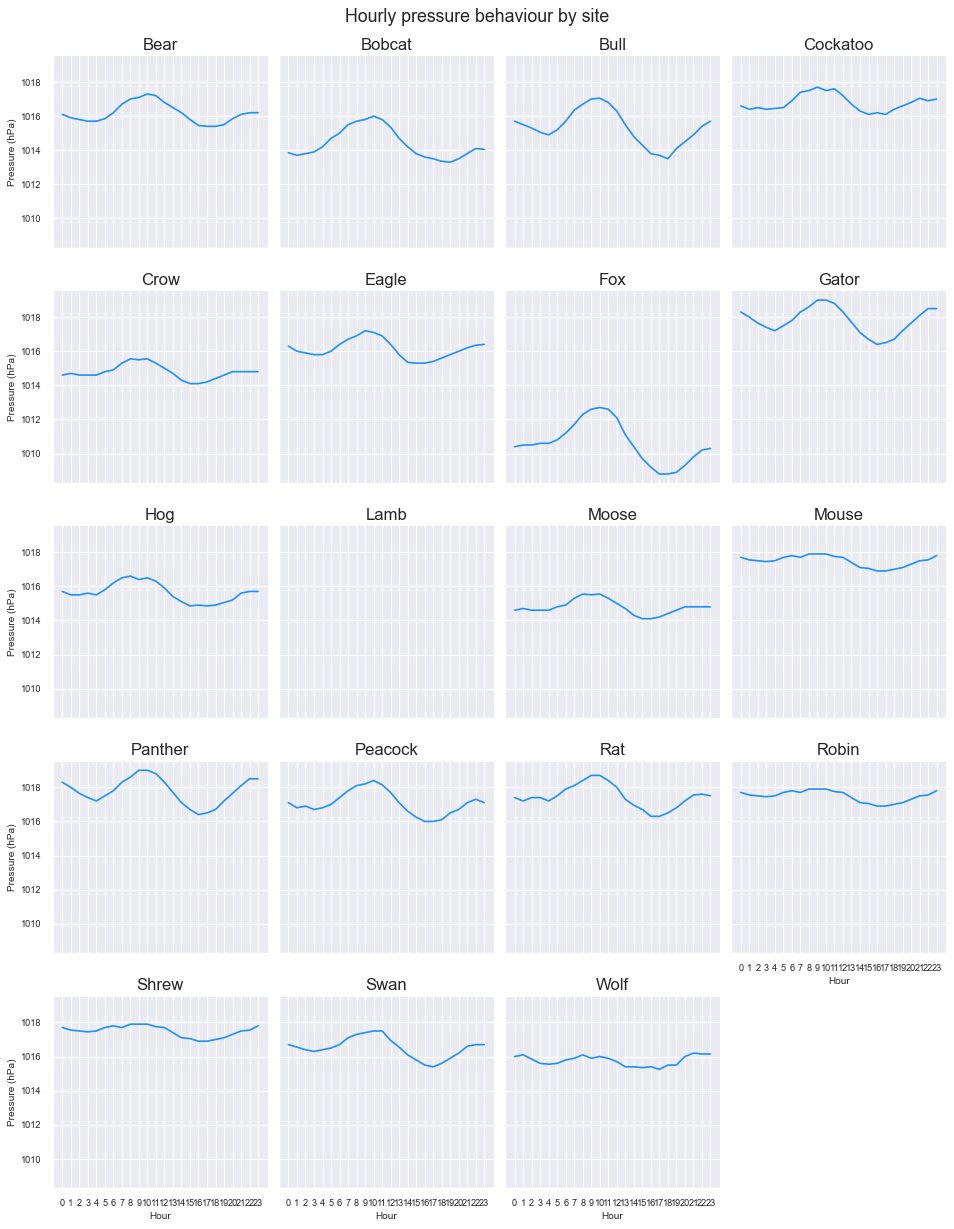

In [53]:
sns.set_theme(rc={'figure.figsize':(12,8)})
sns.set_theme(font_scale = 0.75)
# Creates a temporal dataframe grouped by site and hour
temp = pd.DataFrame(weather.groupby(["site_id", times.hour]).median(numeric_only=True)["seaLvlPressure"]).reset_index()
# All the plots in a grid
g = sns.FacetGrid(temp, col="site_id", col_wrap=4)
g.map(plt.plot, "timestamp", "seaLvlPressure", color=colors[1])
# Title of each plot
g.set_titles("{col_name}", size=15)
# Axis labels
g.set_axis_labels(x_var="Hour", y_var="Pressure (hPa)")
g.set(xticks=range(24))
# Figure title
plt.suptitle('Hourly pressure behaviour by site', y=1.02, fontsize=16)

plt.show()

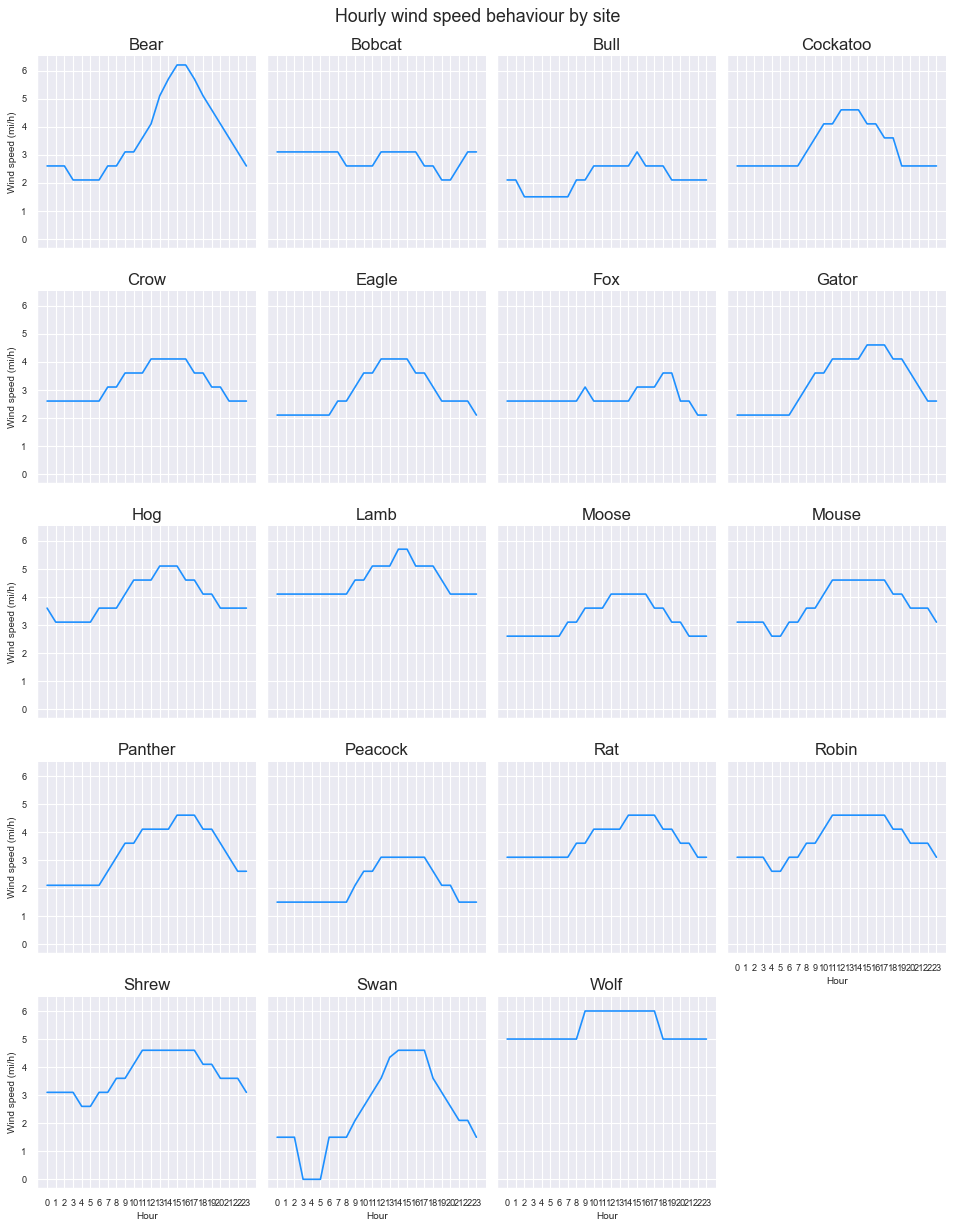

In [54]:
sns.set_theme(rc={'figure.figsize':(12,8)})
sns.set_theme(font_scale = 0.75)
# Creates a temporal dataframe grouped by site and hour
temp = pd.DataFrame(weather.groupby(["site_id", times.hour]).median(numeric_only=True)["windSpeed"]).reset_index()
# All the plots in a grid
g = sns.FacetGrid(temp, col="site_id", col_wrap=4)
g.map(plt.plot, "timestamp", "windSpeed", color=colors[1])
# Title of each plot
g.set_titles("{col_name}", size=15)
# Axis labels
g.set_axis_labels(x_var="Hour", y_var="Wind speed (mi/h)")
g.set(xticks=range(24))
# Figure title
plt.suptitle('Hourly wind speed behaviour by site', y=1.02, fontsize=16)

plt.show()

## Weather data comparisson by year

One of the strategies for prediction could be train with 2016 data and test with 2017. In order to predict 2017 energy meter readings based on weather condition, the distribution of this features should be similar in train and test.

In [55]:
weather2016 = weather[weather["timestamp"] < "2017-01-01 00:00:00"]

In [56]:
weather2017 = weather[weather["timestamp"] >= "2017-01-01 00:00:00"]

In [57]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331166 entries, 0 to 331165
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       331166 non-null  object 
 1   site_id         331166 non-null  object 
 2   airTemperature  331038 non-null  float64
 3   cloudCoverage   160179 non-null  float64
 4   dewTemperature  330838 non-null  float64
 5   precipDepth1HR  197980 non-null  float64
 6   precipDepth6HR  18162 non-null   float64
 7   seaLvlPressure  309542 non-null  float64
 8   windDirection   318161 non-null  float64
 9   windSpeed       330592 non-null  float64
dtypes: float64(8), object(2)
memory usage: 25.3+ MB


### 2016 and 2017 comparisson

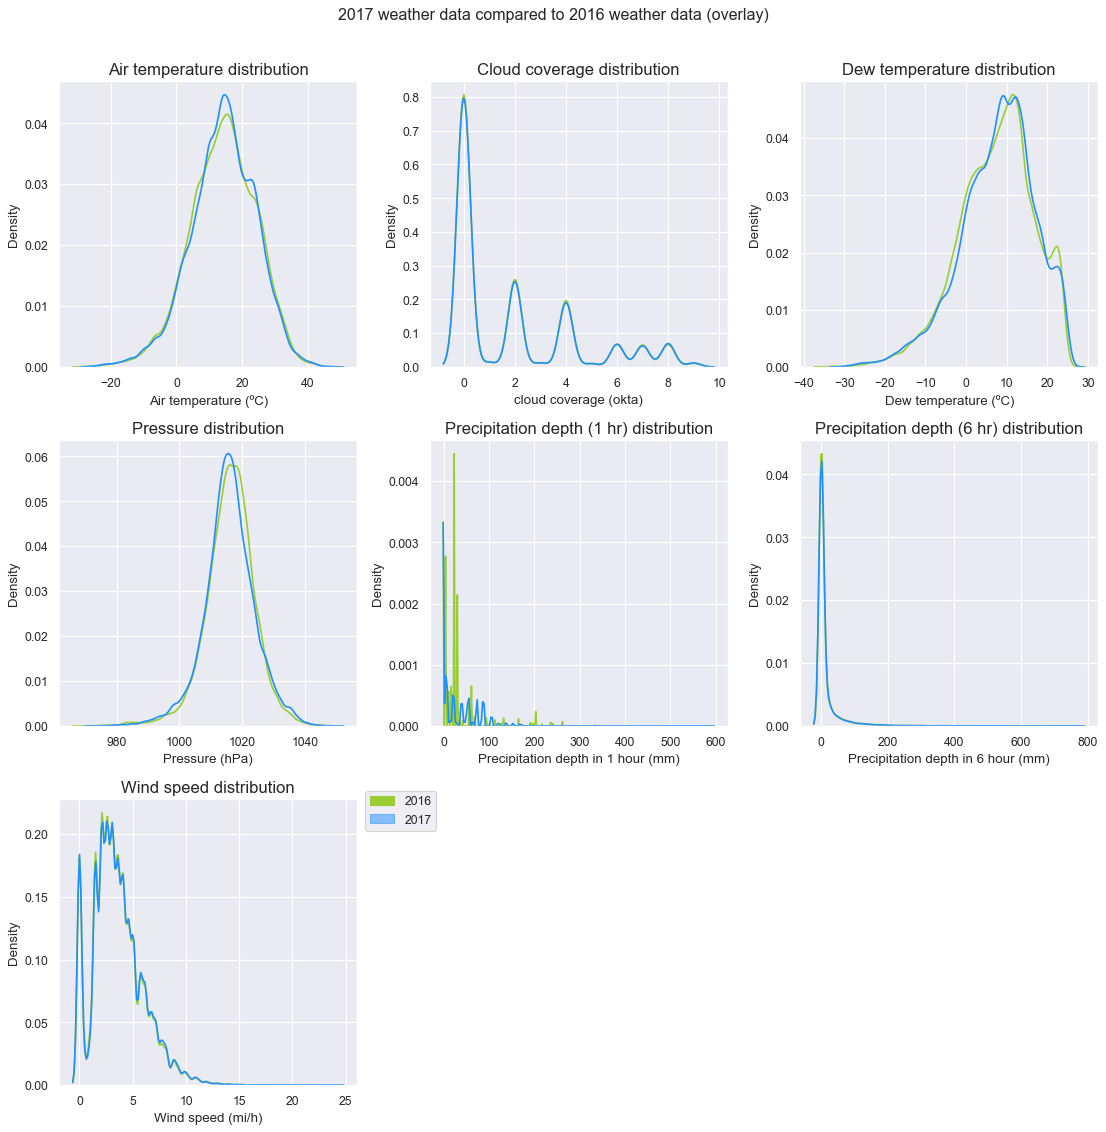

In [59]:
sns.set_theme(rc={'figure.figsize':(14,14)})
#sns.set(font_scale = 1)
f, axes = plt.subplots(3, 3)
axes = axes.flatten()

# "airTemperature" histogram
ax0 = axes[0]
g0 = sns.kdeplot(weather2016["airTemperature"].dropna(), ax=ax0, color = colors[0])
g0b = sns.kdeplot(weather2017["airTemperature"].dropna(), ax=ax0, color = colors[1])
ax0.title.set_text('Air temperature distribution')
ax0.set(xlabel="Air temperature (ºC)")

# "cloudCoverage" histogram
ax1 = axes[1]
g1 = sns.kdeplot(weather2016["cloudCoverage"].dropna(), ax=ax1, color = colors[0])
g1b = sns.kdeplot(weather2017["cloudCoverage"].dropna(), ax=ax1, color = colors[1])
ax1.title.set_text('Cloud coverage distribution')
ax1.set(xlabel="cloud coverage (okta)")

# "dewTemperature" histogram
ax2 = axes[2]
g2 = sns.kdeplot(weather2016["dewTemperature"].dropna(), ax=ax2, color = colors[0])
g2b = sns.kdeplot(weather2017["dewTemperature"].dropna(), ax=ax2, color = colors[1])
ax2.title.set_text('Dew temperature distribution')
ax2.set(xlabel="Dew temperature (ºC)")

# "seaLvlPressure" histogram
ax3 = axes[3]
g3 = sns.kdeplot(weather2016["seaLvlPressure"].dropna(), ax=ax3, color = colors[0])
g3b = sns.kdeplot(weather2017["seaLvlPressure"].dropna(), ax=ax3, color = colors[1])
ax3.title.set_text('Pressure distribution')
ax3.set(xlabel="Pressure (hPa)")

# "precipDepth1HR" histogram
ax4 = axes[4]
g4 = sns.kdeplot(weather2016["precipDepth1HR"].dropna(), ax=ax4, color = colors[0], bw_adjust=0.1)
g4b = sns.kdeplot(weather2017["precipDepth1HR"].dropna(), ax=ax4, color = colors[1], bw_adjust=0.1)
ax4.title.set_text('Precipitation depth (1 hr) distribution')
ax4.set(xlabel="Precipitation depth in 1 hour (mm)")

# "precipDepth6HR" histogram
ax5 = axes[5]
g5 = sns.kdeplot(weather2016["precipDepth6HR"].dropna(), ax=ax5, color = colors[0])
g5b = sns.kdeplot(weather2017["precipDepth6HR"].dropna(), ax=ax5, color = colors[1])
ax5.title.set_text('Precipitation depth (6 hr) distribution')
ax5.set(xlabel="Precipitation depth in 6 hour (mm)")

# "windSpeed" histogram
ax6 = axes[6]
g6 = sns.kdeplot(weather2016["windSpeed"].dropna(), ax=ax6, color = colors[0])
g6b = sns.kdeplot(weather2017["windSpeed"].dropna(), ax=ax6, color = colors[1])
ax6.title.set_text('Wind speed distribution')
ax6.set(xlabel="Wind speed (mi/h)")

# Sets fontsize
for ax in axes:
    ax.title.set_size(15)

# Remove empty axes
f.delaxes(axes[7])
f.delaxes(axes[8])
    
# Customizes legend and title
green_patch = mpatches.Patch(color=colors[0], label='2016')
blue_patch = mpatches.Patch(color=colors[1], label='2017', alpha=0.5)
f.legend(handles=[green_patch, blue_patch], ncol=1,loc=[0.33, 0.266])

f.suptitle("2017 weather data compared to 2016 weather data (overlay)", x = 0.5, y = 1.01)
f.tight_layout()

plt.show()

In [30]:
f.savefig("figures/weather_year.pdf", bbox_inches='tight')
f.savefig("figures/weather_year.png", dpi=72, bbox_inches='tight')